___

<a href='http://www.pieriandata.com'> <img src='../../Pierian_Data_Logo.png' /></a>
___

# SF Salaries Exercise 

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

** Import pandas as pd.**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

** Read Salaries.csv as a dataframe called sal.**

In [7]:
sal = pd.read_csv('Salaries.csv')

** Check the head of the DataFrame. **

In [8]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


** Use the .info() method to find out how many entries there are.**

In [9]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

In [10]:
sal['BasePay'].mean()

np.float64(66325.44884048769)

** What is the highest amount of OvertimePay in the dataset ? **

In [11]:
sal['OvertimePay'].max()

np.float64(245131.88)

** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [12]:
sal.loc[sal['EmployeeName']=='JOSEPH DRISCOLL','JobTitle'].values[0]

'CAPTAIN, FIRE SUPPRESSION'

** How much does JOSEPH DRISCOLL make (including benefits)? **

In [13]:
sal.loc[sal['EmployeeName']=='JOSEPH DRISCOLL', 'TotalPayBenefits'].values[0]

np.float64(270324.91)

** What is the name of highest paid person (including benefits)?**

In [14]:
sal.loc[[sal['TotalPayBenefits'].idxmax()]]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [15]:
sal.loc[[sal['TotalPayBenefits'].idxmin()]]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [16]:
sal.pivot_table(values='BasePay', index='Year', aggfunc='mean')

,BasePay
Year,
2011,63595.956517
2012,65436.406857
2013,69630.030216
2014,66564.421924


** How many unique job titles are there? **

In [17]:
sal['JobTitle'].nunique()

2159

** What are the top 5 most common jobs? **

In [18]:
sal['JobTitle'].value_counts()

JobTitle
Transit Operator                      7036
Special Nurse                         4389
Registered Nurse                      3736
Public Svc Aide-Public Works          2518
Police Officer 3                      2421
                                      ... 
Light Rail Vehicle Equip Eng             1
Civil Case Settlmnt Specialist           1
ADMINISTRATOR, SFGH MEDICAL CENTER       1
CHIEF OF POLICE                          1
Special Assistant 8                      1
Name: count, Length: 2159, dtype: int64

** How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?) **

In [24]:
sum(sal[sal['Year']==2013]['JobTitle'].value_counts() == 1)

202

** How many people have the word Chief in their job title? (This is pretty tricky) **

In [20]:
sal[sal['JobTitle'].str.contains('Chief', case=False, na=False)].shape[0]

627

** Bonus: Is there a correlation between length of the Job Title string and Salary? **

In [21]:
sal['title_len']=sal['JobTitle'].apply(len)



In [22]:
correlation= sal['title_len'].corr(sal['TotalPayBenefits'])
print(correlation)

-0.03687844593260669


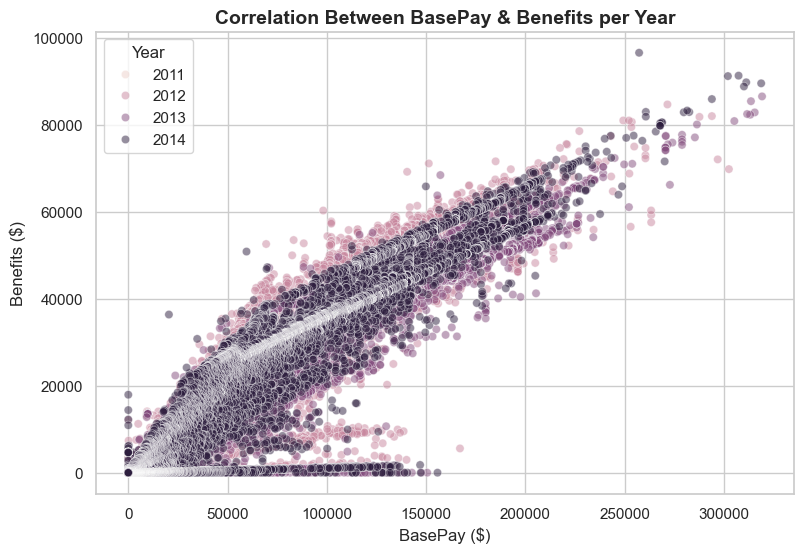

In [35]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=sal, x='BasePay', y='Benefits', hue='Year', alpha=0.5)
plt.title('Correlation Between BasePay & Benefits per Year', fontsize=14, fontweight='bold')
plt.xlabel('BasePay ($)')
plt.ylabel('Benefits ($)')
plt.legend(title='Year')
plt.show()


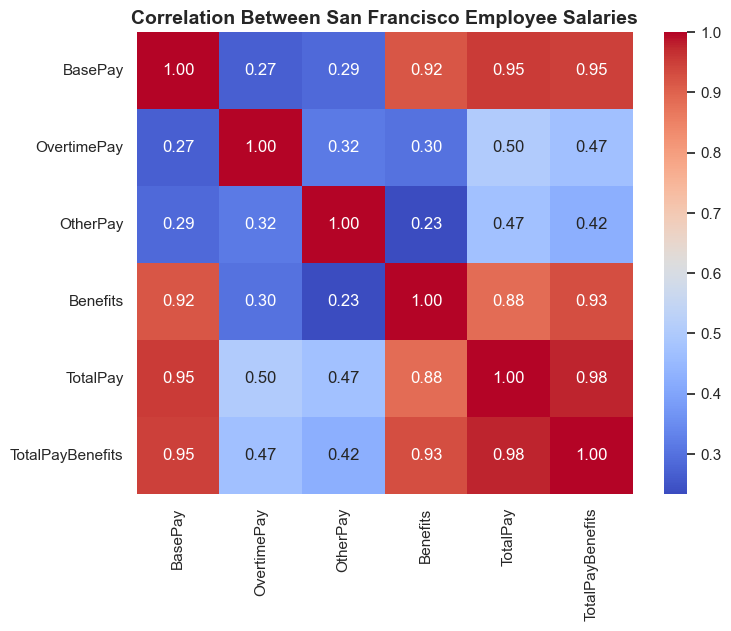

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(sal[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between San Francisco Employee Salaries', fontsize=14, fontweight='bold')
plt.show()